In [ ]:
%reload_ext autoreload
%autoreload 2

In [ ]:
%pip install wget

Note: you may need to restart the kernel to use updated packages.


# 1. Load peptdeep models

In [ ]:
import os
import wget
if not os.path.exists('sandbox/test_files'):
    os.makedirs('sandbox/test_files')
def download_data(url, file_path):
    if not os.path.exists(file_path):
        wget.download(url, file_path)

from peptdeep.utils import (
    evaluate_linear_regression, evaluate_linear_regression_plot
)

from peptdeep.pretrained_models import ModelManager

models = ModelManager()
models.load_installed_models()

2022-08-05 16:20:05> NumExpr defaulting to 8 threads.


In [ ]:
ms2_model = models.ms2_model
ms2_model.get_parameter_num()

3988974

In [ ]:
rt_model = models.rt_model
rt_model.get_parameter_num()

708224

In [ ]:
ccs_model = models.ccs_model
ccs_model.get_parameter_num()

713452

# 2. Test ccs_model

In [ ]:
from alphabase.psm_reader import psm_reader_provider
ccs_url = 'https://datashare.biochem.mpg.de/s/uTGa7PliZzRJU4g/download'
ccs = 'sandbox/test_files/PXD019086_Celegant_evidence.txt'
download_data(ccs_url, ccs)
mq_reader = psm_reader_provider.get_reader('maxquant')
mq_reader.load(ccs)

/Users/zengwenfeng/Workspace/AlphaBase/alphabase/io/psm_reader/psm_reader.py:213: DtypeWarning: Columns (61) have mixed types.Specify dtype option on import or set low_memory=False.
  origin_df = self._load_file(_file)


,sequence,charge,rt,ccs,mobility,scan_num,raw_name,precursor_mz,score,proteins,genes,decoy,spec_idx,mods,mod_sites,nAA,rt_norm
0,LLEDIRK,2,17.960,313.983480,0.771909,3856,20190107_TIMS2_AnBr_SA_200ng_CElegans_Trp_IRT_...,443.771460,51.456,Q9BKU3,,0,3855,,,7,0.149942
1,HLQLAVR,2,17.642,302.866472,0.743901,3300,20190107_TIMS2_AnBr_SA_200ng_CElegans_Trp_IRT_...,418.758687,88.201,Q27485;J7S164;J7SA65;P09588,his-35;his-57;his-3,0,3299,,,7,0.155532
2,HLQLAVR,2,18.518,304.133904,0.747014,3646,20190107_TIMS2_AnBr_SA_200ng_CElegans_Trp_IRT_...,418.758687,79.833,Q27485;J7S164;J7SA65;P09588,his-35;his-57;his-3,0,3645,,,7,0.154342
3,HLQLAVR,1,18.518,276.501981,1.358263,3647,20190107_TIMS2_AnBr_SA_200ng_CElegans_Trp_IRT_...,836.510097,64.547,Q27485;J7S164;J7SA65;P09588,his-35;his-57;his-3,0,3646,,,7,0.154342
4,HLQLAVR,1,17.579,274.632075,1.349078,2898,20190107_TIMS2_AnBr_SA_200ng_CElegans_Trp_IRT_...,836.510097,84.064,Q27485;J7S164;J7SA65;P09588,his-35;his-57;his-3,0,2897,,,7,0.147191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141500,TAPSAIPLAAPALPVPVAAAPFFASPAPVLAAPAPLLAPPAPVFAAPR,3,107.880,774.159191,1.284714,53805,20190107_TIMS2_AnBr_SA_200ng_CElegans_Trp_IRT_...,1511.532720,40.394,Q22263,,0,53804,,,48,0.926486
141501,TAPSAIPLAAPALPVPIAAAPFFTPPAPVLAAPAPLLAPPAPVFAAPR,4,108.520,1086.345571,1.352140,51480,20190107_TIMS2_AnBr_SA_200ng_CElegans_Trp_IRT_...,1147.413090,4.313,Q22262,,0,51479,,,48,0.958742
141502,TAPSAIPLAAPALPVPIAAAPFFTPPAPVLAAPAPLLAPPAPVFAAPR,3,108.580,781.523487,1.296982,32092,20190107_TIMS2_AnBr_SA_200ng_CElegans_Trp_IRT_...,1529.548370,58.044,Q22262,,0,32091,,,48,0.916983
141503,TAPSAIPLAAPALPVPIAAAPFFTPPAPVLAAPAPLLAPPAPVFAAPR,3,108.460,775.979047,1.287781,53839,20190107_TIMS2_AnBr_SA_200ng_CElegans_Trp_IRT_...,1529.548370,115.420,Q22262,,0,53838,,,48,0.931467


## CCS prediction is very good

/Users/zengwenfeng/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,R_square,R,slope,intercept,test_num
0,0.97,0.984886,0.959,-4.8818,141505.0


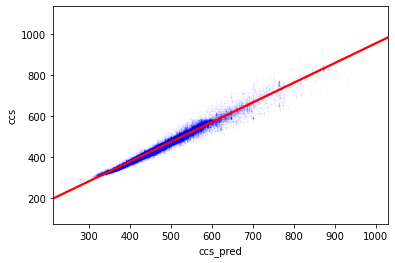

In [ ]:
psm_df = mq_reader.psm_df#.groupby(['sequence','mods','mod_sites','nAA','charge'])['ccs'].median().reset_index()
predict_df = ccs_model.predict(psm_df)
evaluate_linear_regression_plot(predict_df, x='ccs_pred',y='ccs')
evaluate_linear_regression(predict_df, x='ccs_pred',y='ccs')

## Transfer learning on CCS does not provide much help

[Training] Epoch=1, Mean Loss=27.910184693336486
[Training] Epoch=2, Mean Loss=24.601712918281557
[Training] Epoch=3, Mean Loss=23.188055157661438
[Training] Epoch=4, Mean Loss=22.691485035419465
[Training] Epoch=5, Mean Loss=22.55518239736557
[Training] Epoch=6, Mean Loss=22.40070036649704
[Training] Epoch=7, Mean Loss=20.52079952955246
[Training] Epoch=8, Mean Loss=20.285676538944244
[Training] Epoch=9, Mean Loss=19.69653673171997
[Training] Epoch=10, Mean Loss=19.446448934078216


/Users/zengwenfeng/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,R_square,R,slope,intercept,test_num
0,0.972,0.985901,0.9758,11.686,138446.0


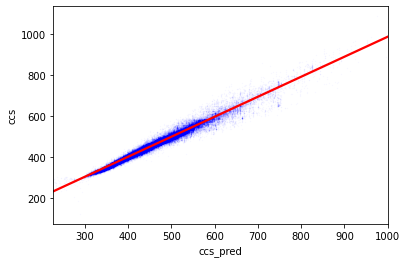

In [ ]:
import numpy as np
import pandas as pd
n_train = 5000

from peptdeep.utils import uniform_sampling
train_df, test_df = uniform_sampling(psm_df, target='ccs', n_train=n_train, return_test_df=True)
ccs_model.train(train_df, verbose=True)
predict_df = ccs_model.predict(test_df)
evaluate_linear_regression_plot(predict_df, x='ccs_pred',y='ccs')
evaluate_linear_regression(predict_df, x='ccs_pred',y='ccs')

# 3. Test rt_model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

def adjust_rt_pred(train_df, test_df, x='rt_pred', y='rt_norm', target='rt_adjust'):
    model = KNeighborsRegressor(n_neighbors=3, weights='distance')
    model.fit(train_df[x].values.reshape((-1,1)), train_df[y].values.reshape((-1,1)))
    test_df[target] = model.predict(test_df[x].values.reshape((-1,1)))
    return test_df

## Test on Pan-human library

In [ ]:
from alphabase.psm_reader import psm_reader_provider

phl_url = 'https://datashare.biochem.mpg.de/s/GyVnHxasODv5hYc/download'
phl = 'sandbox/test_files/phl004_canonical_s32_osw.tsv'
download_data(phl_url, phl)

mq_reader = psm_reader_provider.get_reader('openswath')
mq_reader.load(phl)

mq_reader = psm_reader_provider.get_reader('openswath')
mq_reader.load(phl)

,sequence,charge,rt,precursor_mz,proteins,mods,mod_sites,nAA,rt_norm
0,NPAYIPR,2,-3.8,415.729595,1/O15234,,,7,0.230008
1,HYIFNPR,2,-3.5,473.748319,1/Q9NYU2,,,7,0.231245
2,DADPILR,2,0.1,400.219060,1/P31327,,,7,0.246084
3,HYTEAIK,2,-29.9,431.226885,1/P31948,,,7,0.122424
4,TPEDFLK,2,19.8,425.221269,1/Q9BSJ2,,,7,0.327288
...,...,...,...,...,...,...,...,...,...
204559,LYLTIHSDHEGGNVSAHTSHLVGSALSDPYLSFAAAMNGLAGPLHG...,6,157.7,1075.718990,1/O75390,,,61,0.895713
204560,SGQSSGYGQHGSSSGHSSTHGQHGSTSGQSSSCGQHGASSGQSSSH...,7,-36.6,834.059066,1/Q86YZ3,Carbamidomethyl@C,33,61,0.094806
204561,SPSAVAAAAAAVFHQQHGGQQSPGLAALQSGGGGGLEPYAGPQQNS...,7,78.0,922.862961,1/O14497,,,63,0.567189
204562,DEAAGGAAAAAAEAGAASGEQAAAPGEEAAAGEEGAAGGDPQEAKP...,6,41.9,955.274139,1/P29966,,,63,0.418384


/Users/zengwenfeng/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,R_square,R,slope,intercept,test_num
0,0.924,0.961249,0.7074,0.065,204564.0


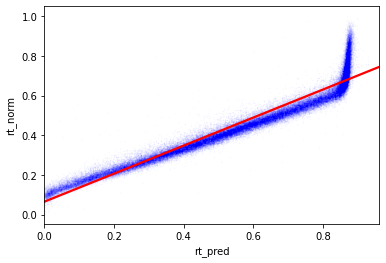

In [ ]:
psm_df = mq_reader.psm_df#.groupby(['sequence','mods','mod_sites','nAA'])['rt_norm'].median().reset_index()
predict_df = rt_model.predict(psm_df)

evaluate_linear_regression_plot(predict_df, x='rt_pred',y='rt_norm')
evaluate_linear_regression(predict_df, x='rt_pred',y='rt_norm')

## Test for KNN-based RT calibration on phl

Better but not very good. It is useful when we only have detected RT values without peptide information.

/Users/zengwenfeng/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,R_square,R,slope,intercept,test_num
0,0.952,0.975705,0.9218,0.0307,199564.0


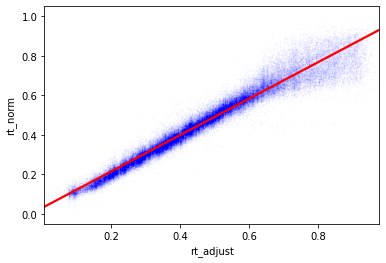

In [ ]:
import numpy as np
import pandas as pd
n_train = 5000

from peptdeep.utils import uniform_sampling
train_df, test_df = uniform_sampling(
    psm_df, target='rt_norm', n_train=n_train, return_test_df=True
)
predict_df = adjust_rt_pred(train_df, test_df)
evaluate_linear_regression_plot(predict_df, x='rt_adjust',y='rt_norm')
evaluate_linear_regression(predict_df, x='rt_adjust',y='rt_norm')

## Transfer learning on phl

In [ ]:
rt_model.train(train_df, epoch=20, verbose=True, verbose_each_epoch=False)

[Training] Epoch=1, Mean Loss=0.0792897620704025
[Training] Epoch=2, Mean Loss=0.06215311035824319
[Training] Epoch=3, Mean Loss=0.04669882221302638
[Training] Epoch=4, Mean Loss=0.03639420343097299
[Training] Epoch=5, Mean Loss=0.028639113258880872
[Training] Epoch=6, Mean Loss=0.024080318903240066
[Training] Epoch=7, Mean Loss=0.020858850601750117
[Training] Epoch=8, Mean Loss=0.01890116071444936
[Training] Epoch=9, Mean Loss=0.017521525151096284
[Training] Epoch=10, Mean Loss=0.0165164604356202
[Training] Epoch=11, Mean Loss=0.01569973584264517
[Training] Epoch=12, Mean Loss=0.015362688185026249
[Training] Epoch=13, Mean Loss=0.014632448379416019
[Training] Epoch=14, Mean Loss=0.014081775972348018
[Training] Epoch=15, Mean Loss=0.013669773625830809
[Training] Epoch=16, Mean Loss=0.012782507563921778
[Training] Epoch=17, Mean Loss=0.013298013752015928
[Training] Epoch=18, Mean Loss=0.012232095366925932
[Training] Epoch=19, Mean Loss=0.012821119078580523
[Training] Epoch=20, Mean Loss

/Users/zengwenfeng/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,R_square,R,slope,intercept,test_num
0,0.989,0.994485,0.9752,0.0099,199564.0


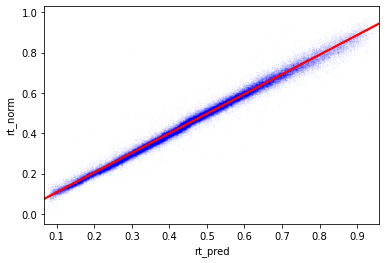

In [ ]:
predict_df = rt_model.predict(test_df)
evaluate_linear_regression_plot(predict_df, x='rt_pred',y='rt_norm')
evaluate_linear_regression(predict_df, x='rt_pred',y='rt_norm')